<a href="https://colab.research.google.com/github/daniloabranches/bootcamp_machine_learning_igti/blob/master/desafio_modulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [430]:
files.upload()

{}

In [0]:
df_winequality = pd.read_csv("winequality-red.csv", sep=';')

In [432]:
df_winequality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [433]:
df_winequality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [434]:
#No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?

df_winequality.shape

(1599, 12)

In [435]:
df_winequality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [436]:
df_winequality.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [437]:
#Quantos tipos diferentes de dados existem no dataset do desafio?

df_winequality.dtypes.nunique()

2

In [438]:
#Qual é a proporção (em %) de valores nulos existente na coluna "residual sugar" (resíduo de açucar)?

df_winequality['residual sugar'].isnull().mean() * 100

0.0

In [439]:
#Qual é o desvio padrão para a variável "fixed acidity" ?

df_winequality['fixed acidity'].describe()['std']

1.7410963181277006

In [440]:
#Qual é a mediana para a variável "residual sugar"?

df_winequality['residual sugar'].median()

2.2

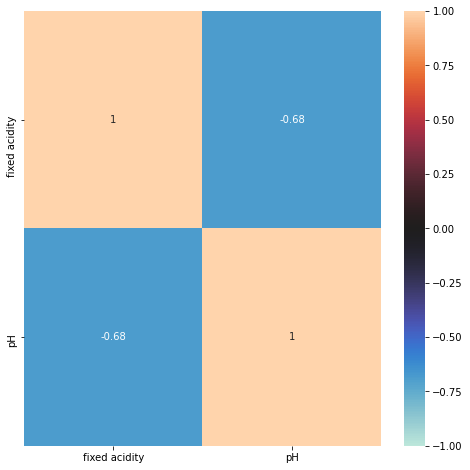

In [441]:
#Sobre o coeficiente de correlação de Pearson entre as variáveis "fixed acidity" e "pH" é CORRETO afirmar:

df_matriz_corr = df_winequality[['fixed acidity', 'pH']]

plt.figure(figsize=(8, 8))
matriz_de_correlacao = df_matriz_corr.corr()
sn.heatmap(matriz_de_correlacao, annot=True, vmin=-1, vmax=1, center=0)
plt.show()

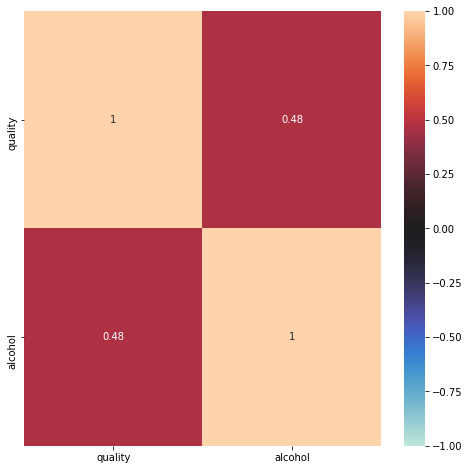

In [442]:
#Mesmo sendo reduzido, é CORRETO dizer sobre o coeficiente de correlação de Pearson entre as variáveis "quality" e "alcohol":

df_matriz_corr = df_winequality[['quality', 'alcohol']]

plt.figure(figsize=(8, 8))
matriz_de_correlacao = df_matriz_corr.corr()
sn.heatmap(matriz_de_correlacao, annot=True, vmin=-1, vmax=1, center=0)
plt.show()

In [443]:
#Quantas instâncias existem para a qualidade do vinho igual a 5?

df_winequality[df_winequality['quality'] == 5].shape[0]

681

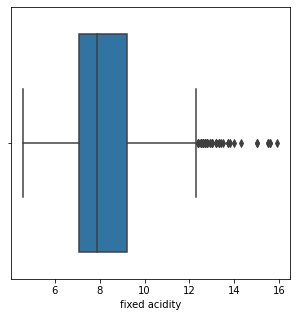

In [444]:
#df_winequality[['fixed acidity']].boxplot()

plt.figure(figsize=(5, 5))
sn.boxplot(df_winequality['fixed acidity'])

In [445]:
scaler = MinMaxScaler()

ds_winequality = scaler.fit_transform(df_winequality)
df_winequality_normalizado = pd.DataFrame(ds_winequality, columns=df_winequality.columns)
df_winequality_normalizado['quality'] = df_winequality['quality']

df_winequality_normalizado.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5


In [446]:
df_winequality_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [447]:
#Aplique o modelo de normalização MinMaxScaler com os valores "default" para os dados de entrada. Qual é o menor valor para a variável "fixed acidity"?

df_winequality_normalizado['fixed acidity'].describe()['min']

0.0

In [0]:
X = df_winequality_normalizado.iloc[:, :-1].values
y = df_winequality_normalizado.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.30)

In [449]:
#Após dividir o dataset utilizando o método train_test_split(entradas_normalizadas, saida, test_size=0.30, random_state=1). Qual foi a acurária para o KNN?
#Aplicando o algoritmo de árvore de decisão com os parâmetros definidos no enunciado do desafio e a divisão de treinamento e teste como mostrado, anteriormente. Qual é o valor da acurácia?
#Aplicando o algoritmo de floresta randomica com os mesmos parâmetros apresentados no enunciado e mesmos valores treinamento e teste, qual é o valor da acurácia?
#Aplicando o algoritmo SVM para a classificação da qualidade dos vinhos com os mesmos valores anteriores para treinamento e teste, qual é o valor de acurácia obtido?
#Apicando a rede MLP como mostrado no enunciado e com os mesmos dados de treinamento e teste utilizados, qual é a acurácia do modelo?

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_arvore = DecisionTreeClassifier(random_state=4)
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
clf_svm = SVC(gamma='auto', kernel='rbf')
clf_mlp = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)

models = [['KNN', clf_KNN], ['Tree', clf_arvore], ['Random Forest', clf_floresta], ['SVM', clf_svm], ['MLP', clf_mlp]]

for item in models:
  model_name = item[0]
  model = item[1]
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracia = accuracy_score(y_test, y_pred)
  print (f"Acuracia {model_name}: {accuracia}")

Acuracia KNN: 0.5645833333333333
Acuracia Tree: 0.5833333333333334
Acuracia Random Forest: 0.6791666666666667
Acuracia SVM: 0.5854166666666667
Acuracia MLP: 0.6


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [450]:
#Modifique o dataset para um sistema binário que considere vinhos com nota maior do que 5 (6, 7, 8) sejam bons e menores ou igual a 5 ruins (5, 4, 3).
#Aplique o modelo da floresta randômica. Qual a acurácia do modelo para esse novo dataset?

df_winequality_normalizado_binario = df_winequality_normalizado.copy()

df_winequality_normalizado_binario.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5


In [451]:
quality = df_winequality_normalizado_binario.iloc[:, -1]

quality[quality <= 5] = 0
quality[quality > 5] = 1

df_winequality_normalizado_binario['quality'] = quality

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [452]:
df_winequality_normalizado_binario.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0
5,0.247788,0.369863,0.00,0.061644,0.105175,0.169014,0.120141,0.567548,0.606299,0.137725,0.153846,0
6,0.292035,0.328767,0.06,0.047945,0.095159,0.197183,0.187279,0.464758,0.440945,0.077844,0.153846,0
7,0.238938,0.363014,0.00,0.020548,0.088481,0.197183,0.053004,0.332599,0.511811,0.083832,0.246154,1
8,0.283186,0.315068,0.02,0.075342,0.101836,0.112676,0.042403,0.494126,0.488189,0.143713,0.169231,1
9,0.256637,0.260274,0.36,0.356164,0.098497,0.225352,0.339223,0.567548,0.480315,0.281437,0.323077,0


In [453]:
X = df_winequality_normalizado_binario.iloc[:, :-1].values
y = df_winequality_normalizado_binario.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.30)

clf_floresta.fit(X_train, y_train)
y_pred = clf_floresta.predict(X_test)

accuracia = accuracy_score(y_test, y_pred)
print ("Acuracia utilizando Random Forest :" , accuracia)

Acuracia utilizando Random Forest : 0.8041666666666667
